In [1]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
import time
import seaborn as sns

In [2]:
df = pd.read_csv("../data/repos/findal_df.csv")
dataframes = dict()
dataframes["cross-project"] = df
dataframes["elasticsearch"] =  df[df.repository == "elasticsearch"]
dataframes["spring-framework"] =  df[df.repository == "spring-framework"]
dataframes["spring-boot"] =  df[(df.repository == "spring-boot") & (df.closer_login != "spring-issuemaster")]
repos = list(dataframes.keys())

F:\Users\PC_Kiana\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,22,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dataframes["cross-project"].repository.value_counts()

elasticsearch       44100
spring-framework    19717
spring-boot         15255
Name: repository, dtype: int64

In [5]:
for repo in repos:
    print(f"{repo}:")
    print("median of reaction time -->", dataframes[repo].reaction_time.median())
    print(dataframes[repo].reaction_time.describe())
    print("-------------------")

cross-project:
median of reaction time --> 47.73333333333333
count    5.705100e+04
mean     1.155165e+05
std      6.140390e+05
min      0.000000e+00
25%      5.000000e-02
50%      4.773333e+01
75%      1.329117e+03
max      7.488217e+06
Name: reaction_time, dtype: float64
-------------------
elasticsearch:
median of reaction time --> 1.9916666666666663
count    3.172400e+04
mean     1.573315e+04
std      1.453861e+05
min      0.000000e+00
25%      3.333333e-02
50%      1.991667e+00
75%      2.576375e+02
max      3.578191e+06
Name: reaction_time, dtype: float64
-------------------
spring-framework:
median of reaction time --> 1346.7
count    1.591700e+04
mean     3.789264e+05
std      1.100732e+06
min      0.000000e+00
25%      8.595000e+01
50%      1.346700e+03
75%      2.884787e+04
max      7.488217e+06
Name: reaction_time, dtype: float64
-------------------
spring-boot:
median of reaction time --> 46.13333333333333
count    9.391000e+03
mean     6.349494e+03
std      4.993560e+04
min

In [3]:
important_events_name = [
    "assigned",
    "closed",
    "labeled",
    "mentioned",
    "merged",
    "milestoned",
    "referenced",
    "review_requested",
    "added_to_project",
    "converted_note_to_issue",
    "moved_columns_in_project",
]
# "subscribed"

determinative_events_name = [
    "milestoned","assigned",
    "merged",
    "referenced",
    "added_to_project",
    "converted_note_to_issue",
    "moved_columns_in_project",
]
#comment

In [4]:
def compute_time_interval(t1, t2):
    d1 = datetime.strptime(t1, "%Y-%m-%dT%H:%M:%SZ")
    d2 = datetime.strptime(t2, "%Y-%m-%dT%H:%M:%SZ")
    delta = d2-d1
    minutes = delta.days*24*60 + delta.seconds/60
    return minutes

In [5]:
#number of merged issues
df['important_events'].apply(lambda x: 1 if "merged" in json.loads(x) else 0).value_counts()

0    18280
1       41
Name: important_events, dtype: int64

In [6]:
def issues_event_time(event_name):
    times = df.apply(lambda x: np.nan if not event_name in x['important_events'] else compute_time_interval(x['issue_created_at'], json.loads(x['important_events'])[event_name]), axis=1)
    times.hist()
    print(times.describe())
    return times

count       41.000000
mean      2966.494715
std       9791.762640
min          1.900000
25%         24.650000
50%        211.883333
75%       1171.350000
max      60588.333333
dtype: float64


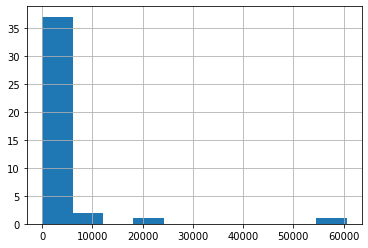

In [9]:
df["merge_time"] = issues_event_time("merged")

count    6.872000e+03
mean     5.461732e+04
std      2.069436e+05
min      1.666667e-01
25%      1.882625e+02
50%      2.487375e+03
75%      2.149942e+04
max      3.168416e+06
dtype: float64


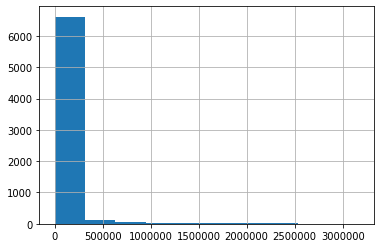

In [10]:
df["referenced_time"] = issues_event_time("referenced")

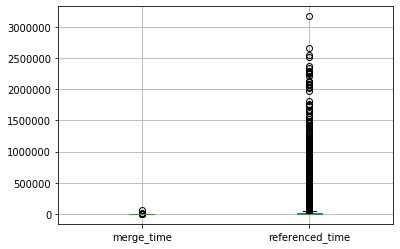

In [11]:
df.boxplot(column=['merge_time', "referenced_time"])

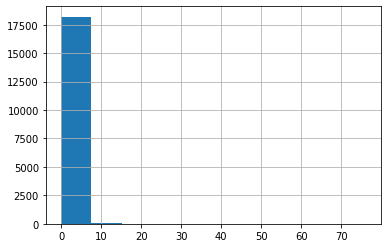

In [12]:
df['commits_count'].hist()

In [13]:
df['commits_count'].value_counts()

0     7374
1     5955
2     2925
3     1279
4      380
5      168
6       82
7       43
8       40
9       22
11      11
10      11
12      10
14       5
19       4
15       3
16       2
36       1
76       1
18       1
13       1
49       1
33       1
29       1
Name: commits_count, dtype: int64

In [14]:
df["reaction_time"].isna().value_counts()

False    12326
True      5995
Name: reaction_time, dtype: int64

In [15]:
df["reaction_time"].describe()

count    1.232600e+04
mean     5.167651e+03
std      4.669056e+04
min      0.000000e+00
25%      0.000000e+00
50%      8.791667e+00
75%      4.019625e+02
max      1.786914e+06
Name: reaction_time, dtype: float64

In [16]:
xx = df[df.reaction_time!=0]

In [17]:
xx.reaction_time.describe()

count    8.350000e+03
mean     7.628319e+03
std      5.656332e+04
min      1.666667e-02
25%      7.183333e+00
50%      1.251833e+02
75%      9.885542e+02
max      1.786914e+06
Name: reaction_time, dtype: float64

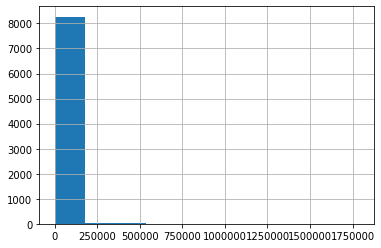

In [18]:
xx.reaction_time.hist()

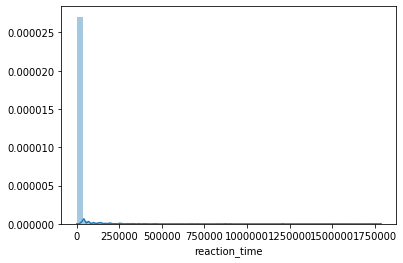

In [25]:
sns.distplot(xx.reaction_time)

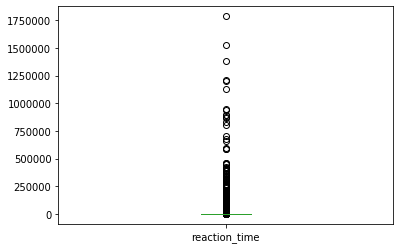

In [26]:
xx.reaction_time.plot.box()